In [262]:
import pandas as pd
import numpy as np

In [263]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [264]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [265]:
print("Quantidade de nomes: " + len(nomes_f) + len(nomes_m))

TypeError: can only concatenate str (not "int") to str

In [ ]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [ ]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [ ]:
pd.concat(frames)['nome'].to_frame()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(10)

,nome
99,WILLIAN
108,VALTER
132,NICOLAS
186,ERIC
95,ALESSANDRO
54,MARIO
30,ANDERSON
74,ALAN
82,DAVID
84,SEVERINO


#Criando os nomes Colunas

In [ ]:
np.random.seed(123)
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio
84,SEVERINO,142,@dominiodoemmail.com.br
0,JOSE,275,@servicodoemail.com
179,IAGO,296,@dominiodoemmail.com.br


In [ ]:
from sys import prefix
from tokenize import String


nomes["id_aluno"] = np.random.permutation(total_alunos) + 1
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

nomes["prefix"] = nomes.nome+nomes['id_aluno'].astype(str)

nomes['email'] = nomes.prefix.str.cat(nomes.dominio).str.lower()


nomes.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nome        400 non-null    object
 1   id_aluno    400 non-null    int32 
 2   dominio     400 non-null    object
 3   prefix      400 non-null    object
 4   email       400 non-null    object
 5   matriculas  400 non-null    int32 
dtypes: int32(2), object(4)
memory usage: 18.8+ KB


In [ ]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)


nomes

,nome,id_aluno,dominio,prefix,email,matriculas
0,MARIA,365,@dominiodoemmail.com.br,MARIA365,maria365@dominiodoemmail.com.br,1
1,ANA,108,@dominiodoemmail.com.br,ANA108,ana108@dominiodoemmail.com.br,1
2,FRANCISCA,338,@dominiodoemmail.com.br,FRANCISCA338,francisca338@servicodoemail.com,1
3,ANTONIA,180,@dominiodoemmail.com.br,ANTONIA180,antonia180@servicodoemail.com,2
4,ADRIANA,173,@servicodoemail.com,ADRIANA173,adriana173@dominiodoemmail.com.br,2
...,...,...,...,...,...,...
195,WALTER,6,@servicodoemail.com,WALTER6,walter6@dominiodoemmail.com.br,3
196,ARLINDO,1,@servicodoemail.com,ARLINDO1,arlindo1@dominiodoemmail.com.br,1
197,MICHAEL,283,@dominiodoemmail.com.br,MICHAEL283,michael283@dominiodoemmail.com.br,1
198,ALVARO,90,@dominiodoemmail.com.br,ALVARO90,alvaro90@servicodoemail.com,2


In [ ]:
!pip3 install html5lib
!pip3 install lxml


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [270]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [271]:
type(cursos)

list

In [272]:
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [273]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [274]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})


cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [275]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [276]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [277]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [278]:
nomes['matriculas'] = np.random.exponential(size=total_alunos).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,prefix,email,matriculas
177,JENIFER,126,@dominiodoemmail.com.br,JENIFER126,jenifer126@servicodoemail.com,0
173,GERALDA,80,@servicodoemail.com,GERALDA80,geralda80@dominiodoemmail.com.br,1
22,VITORIA,211,@servicodoemail.com,VITORIA211,vitoria211@dominiodoemmail.com.br,0
5,PAULO,166,@servicodoemail.com,PAULO166,paulo166@servicodoemail.com,0
165,ISAIAS,33,@dominiodoemmail.com.br,ISAIAS33,isaias33@dominiodoemmail.com.br,3


In [279]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,prefix,email,matriculas
3,ANTONIA,180,@dominiodoemmail.com.br,ANTONIA180,antonia180@servicodoemail.com,3
153,CAUA,311,@dominiodoemmail.com.br,CAUA311,caua311@dominiodoemmail.com.br,4
4,CARLOS,28,@dominiodoemmail.com.br,CARLOS28,carlos28@servicodoemail.com,1
36,DEBORA,321,@servicodoemail.com,DEBORA321,debora321@servicodoemail.com,1
148,APARECIDO,71,@servicodoemail.com,APARECIDO71,aparecido71@servicodoemail.com,1


In [280]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)


,nome,id_aluno,dominio,prefix,email,matriculas
27,LUANA,267,@servicodoemail.com,LUANA267,luana267@servicodoemail.com,4
12,AMANDA,219,@dominiodoemmail.com.br,AMANDA219,amanda219@dominiodoemmail.com.br,3
74,LAURA,52,@servicodoemail.com,LAURA52,laura52@servicodoemail.com,4
6,PEDRO,141,@dominiodoemmail.com.br,PEDRO141,pedro141@dominiodoemmail.com.br,5
133,BRENDA,306,@servicodoemail.com,BRENDA306,brenda306@dominiodoemmail.com.br,2


In [281]:
nomes.matriculas.describe()


count    400.000000
mean       2.027500
std        1.405946
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1     193
2     101
3      63
5      15
4      13
6      10
8       2
7       2
10      1
Name: matriculas, dtype: int64

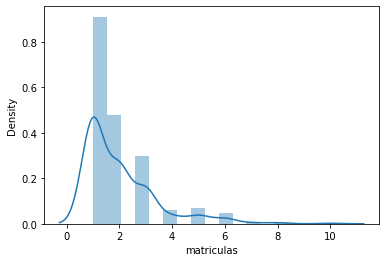

In [282]:
import seaborn as sns
sns.distplot(nomes.matriculas)
nomes.matriculas.value_counts()


In [283]:
nomes.sample(5)


,nome,id_aluno,dominio,prefix,email,matriculas
102,MARILENE,390,@dominiodoemmail.com.br,MARILENE390,marilene390@servicodoemail.com,1
95,ALESSANDRO,234,@servicodoemail.com,ALESSANDRO234,alessandro234@dominiodoemmail.com.br,1
145,ITALO,76,@servicodoemail.com,ITALO76,italo76@dominiodoemmail.com.br,1
44,RAIMUNDA,355,@servicodoemail.com,RAIMUNDA355,raimunda355@dominiodoemmail.com.br,3
169,JOELMA,293,@servicodoemail.com,JOELMA293,joelma293@servicodoemail.com,3


In [284]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)


In [285]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,365,9
1,365,4
2,108,8
3,338,1
4,180,11


In [286]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,57,Lógica de programação
2,51,Java para Web
3,51,C# para Web
4,47,Ruby on Rails
5,51,Cursos de Python
6,74,PHP com MySql
7,18,.NET para web
8,69,Novas integrações com Java
9,49,TDD com Java


In [287]:
nomes.sample(5)

,nome,id_aluno,dominio,prefix,email,matriculas
127,JULIANO,56,@servicodoemail.com,JULIANO56,juliano56@dominiodoemmail.com.br,1
164,JAIRO,315,@servicodoemail.com,JAIRO315,jairo315@servicodoemail.com,2
92,VALERIA,153,@servicodoemail.com,VALERIA153,valeria153@servicodoemail.com,2
7,FERNANDA,16,@dominiodoemmail.com.br,FERNANDA16,fernanda16@servicodoemail.com,1
161,DAMIAO,155,@dominiodoemmail.com.br,DAMIAO155,damiao155@dominiodoemmail.com.br,1


In [289]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

exportação


In [291]:
matriculas_por_curso.to_csv('matriculas_por_curso.json', index=False)
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,57,Lógica de programação
1,51,Java para Web
2,51,C# para Web
3,47,Ruby on Rails
4,51,Cursos de Python
5,74,PHP com MySql
6,18,.NET para web
7,69,Novas integrações com Java
8,49,TDD com Java
9,10,Código limpo com C#


SQL

In [314]:
print(engine.table_names())

['matriculas']


C:\Users\souva\AppData\Local\Temp\ipykernel_17772\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [315]:
!pip3 install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable


In [316]:
from sqlalchemy import create_engine, MetaData, Table

In [317]:
engine = create_engine('sqlite:///:memory:')
type(engine)

sqlalchemy.engine.base.Engine

In [318]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [319]:
print(engine.table_names())

['matriculas']


C:\Users\souva\AppData\Local\Temp\ipykernel_17772\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


query sql

In [320]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [321]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,7,18,.NET para web
1,10,10,Código limpo com C#
2,12,9,Hardware básico
3,13,19,Persistência com .NET
4,15,9,Análise de dados
5,17,17,Internet das coisas


In [322]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,7,18,.NET para web
1,10,10,Código limpo com C#
2,12,9,Hardware básico
3,13,19,Persistência com .NET
4,15,9,Análise de dados
5,17,17,Internet das coisas


In [323]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,57
1,Java para Web,51
2,C# para Web,51
3,Ruby on Rails,47
4,Cursos de Python,51
5,PHP com MySql,74
6,.NET para web,18
7,Novas integrações com Java,69
8,TDD com Java,49
9,Código limpo com C#,10


In [324]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [325]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,74
7,Novas integrações com Java,69
18,Boas práticas em Java,73


In [326]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos


In [327]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

0

In [328]:
print(engine.table_names())


['matriculas', 'muitas_matriculas']


C:\Users\souva\AppData\Local\Temp\ipykernel_17772\224578794.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [329]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,57,Lógica de programação
2,51,Java para Web
3,51,C# para Web
4,47,Ruby on Rails
5,51,Cursos de Python


In [330]:
matriculas.head()

,id_aluno,id_curso
0,365,9
1,365,4
2,108,8
3,338,1
4,180,11


In [331]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [332]:
proxima_turma.head()

,id_aluno,id_curso
101,355,16
118,228,16
162,73,16
173,52,16
194,305,16


In [333]:
nomes.sample(3)

,nome,id_aluno,dominio,prefix,email,matriculas
89,ROSANA,111,@dominiodoemmail.com.br,ROSANA111,rosana111@dominiodoemmail.com.br,1
63,MIGUEL,8,@servicodoemail.com,MIGUEL8,miguel8@servicodoemail.com,2
85,FABRICIO,387,@dominiodoemmail.com.br,FABRICIO387,fabricio387@dominiodoemmail.com.br,1


In [334]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,prefix,email,matriculas
id_aluno,,,,,,
355,16,RAIMUNDA,@servicodoemail.com,RAIMUNDA355,raimunda355@dominiodoemmail.com.br,3
228,16,JOANA,@servicodoemail.com,JOANA228,joana228@servicodoemail.com,10
73,16,ISABELA,@dominiodoemmail.com.br,ISABELA73,isabela73@dominiodoemmail.com.br,2
52,16,LAURA,@servicodoemail.com,LAURA52,laura52@servicodoemail.com,4
305,16,CRISTINA,@servicodoemail.com,CRISTINA305,cristina305@servicodoemail.com,2
140,16,EVA,@dominiodoemmail.com.br,EVA140,eva140@servicodoemail.com,1
364,16,LAIS,@servicodoemail.com,LAIS364,lais364@dominiodoemmail.com.br,1
382,16,SEBASTIANA,@servicodoemail.com,SEBASTIANA382,sebastiana382@dominiodoemmail.com.br,5
142,16,ANGELICA,@servicodoemail.com,ANGELICA142,angelica142@dominiodoemmail.com.br,5


In [335]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
355      RAIMUNDA
228         JOANA
73        ISABELA
52          LAURA
305      CRISTINA
140           EVA
364          LAIS
382    SEBASTIANA
142      ANGELICA
236       REGIANE
293        JOELMA
363        MARCOS
350       LUCIANO
208        CICERO
336          JAIR
159         ARTUR
21        VICENTE
138        ADEMIR
35           RUAN
94         ISMAEL
Name: nome, dtype: object

In [336]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [337]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [338]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [339]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
355,RAIMUNDA
228,JOANA
73,ISABELA
52,LAURA
305,CRISTINA
140,EVA
364,LAIS
382,SEBASTIANA
142,ANGELICA


In [341]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
355,RAIMUNDA
228,JOANA
73,ISABELA
52,LAURA
305,CRISTINA
140,EVA
364,LAIS
382,SEBASTIANA
142,ANGELICA


In [343]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,RAIMUNDA
1,JOANA
2,ISABELA
3,LAURA
4,CRISTINA
5,EVA
6,LAIS
7,SEBASTIANA
8,ANGELICA
9,REGIANE
